In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X,y= make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

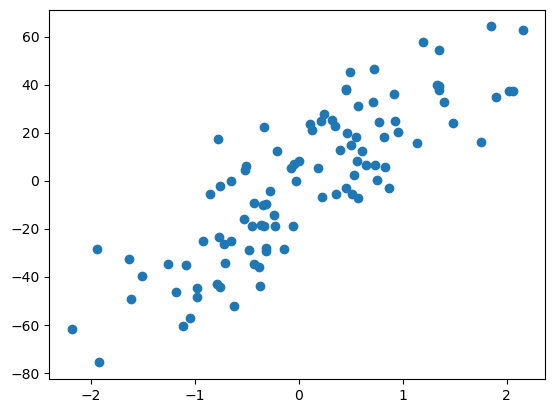

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [7]:
lr= LinearRegression()
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)


[27.82809103]
-2.29474455867698


In [8]:
from sklearn.linear_model import Ridge

In [9]:
rg= Ridge(alpha=10)
rg.fit(X,y)
print(rg.coef_)
print(rg.intercept_)

[24.9546267]
-2.1269130035235726


In [10]:
rg1= Ridge(alpha=100)
rg1.fit(X,y)
print(rg1.coef_)
print(rg1.intercept_)

[12.93442104]
-1.4248441496033308


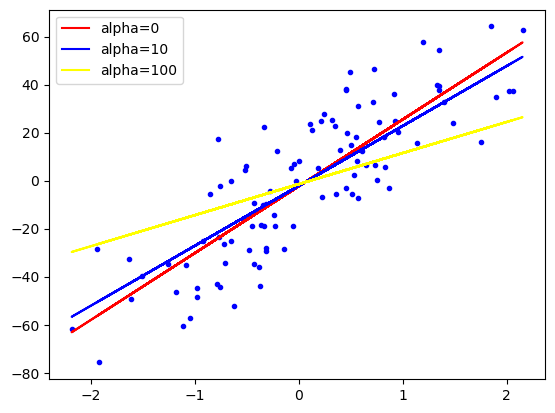

In [12]:
plt.plot(X,y, 'b.')
plt.plot(X,lr.predict(X), color='red', label='alpha=0')
plt.plot(X,rg.predict(X), color='blue', label='alpha=10')
plt.plot(X,rg1.predict(X), color='yellow', label='alpha=100')
plt.legend()

In [13]:
def linear_regression(X,y, alpha=1):
    x_mean=X.mean()
    y_mean=y.mean()
    
    num=0
    den=0
    
    for i in range(X.shape[0]):
        num= num + (y[i] - y_mean) * (X[i] - x_mean)
        den= den + (X[i] - x_mean) * (X[i] - x_mean)
        
    m= num/(den+alpha)
    b= y_mean - m*x_mean
    
    return m,b

In [14]:
class myRidge:
    
    def __init__(self, alpha=0.1):
        self.alpha=alpha
        self.m= None
        self.b= None
        
    def fit(self, X_train, y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num= num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den= den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
        
        self.m= num/(den + self.alpha)
        self.b= y_train.mean() - (self.m*X_train.mean())
        print(self.m, self.b)
        
    def predict(X_test):
        return self.m*X_test + self.b

In [19]:
reg= myRidge(alpha=150)

In [20]:
reg.fit(X,y)

[10.20385545] [-1.26535894]


# Ridge Regressor for ND Data

In [21]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

In [22]:
X, y= load_diabetes(return_X_y=True)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=4)

In [36]:
regg=Ridge(alpha=0.1, solver='cholesky')

In [37]:
regg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [38]:
y_pred= regg.predict(X_test)
r2_score(y_test, y_pred)

0.4693066828920974

In [39]:
print(regg.coef_)
print(regg.intercept_)

[  44.02025512 -241.69666596  452.98163524  332.04993719  -76.34010147
  -68.52063199 -164.98817213  149.9687712   431.61985919   58.51762582]
150.89050209333024


In [51]:
class MineRidgeRegressor:
    def __init__(self, alpha=0.1):
        
        self.alpha=alpha
        self.coef_=None
        self.intercept_= None
        
    def fit(self, X_train, y_train):
        
        X_train= np.insert(X_train,0,1,axis=1)#np.insert(dataset, index, value, axis)
        I= np.identity(X_train.shape[1])
        I[0][0]=0
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_= result[0]
        self.coef_= result[1:]
        
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [52]:
reggg= MineRidgeRegressor()
reggg.fit(X_train,y_train)
y_pred= reggg.predict(X_test)
print('R2-Score ', r2_score(y_test, y_pred))
print('Coef_', reggg.coef_)
print('Intercept_ ', reggg.intercept_)

R2-Score  0.46930668289209776
Coef_ [  44.02025512 -241.69666596  452.98163524  332.04993719  -76.34010147
  -68.52063199 -164.98817213  149.9687712   431.61985919   58.51762582]
Intercept_  150.8905020933302
